# 1.Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2.Loading the Dataset

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3.EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We have :
* 10000 data points with 14 columns,
* 13 independent variables and 1 dependent variable(Exited),
* No null values,
* 3 categorical features namely, Surname, Geography and Gender.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Now, we shall explore the categorical and numerical(continuous) variables separately. From the dataset, we can observe that we have:
* **Categorical variables** : Surname, Geography, Gender, HasCrCard, IsActiveMember and Exited(target variable).
* **Numerical variables** : RowNumber, CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary	

## 3.1 Categorical Variables

Now, among the categorical variables, Surnames probably would have huge number of ditinct values. So we would not consider it for visualisation purposes.

In [ ]:
df.Surname.nunique()

2932

Point proved!

In [ ]:
# List of categorical variables
cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

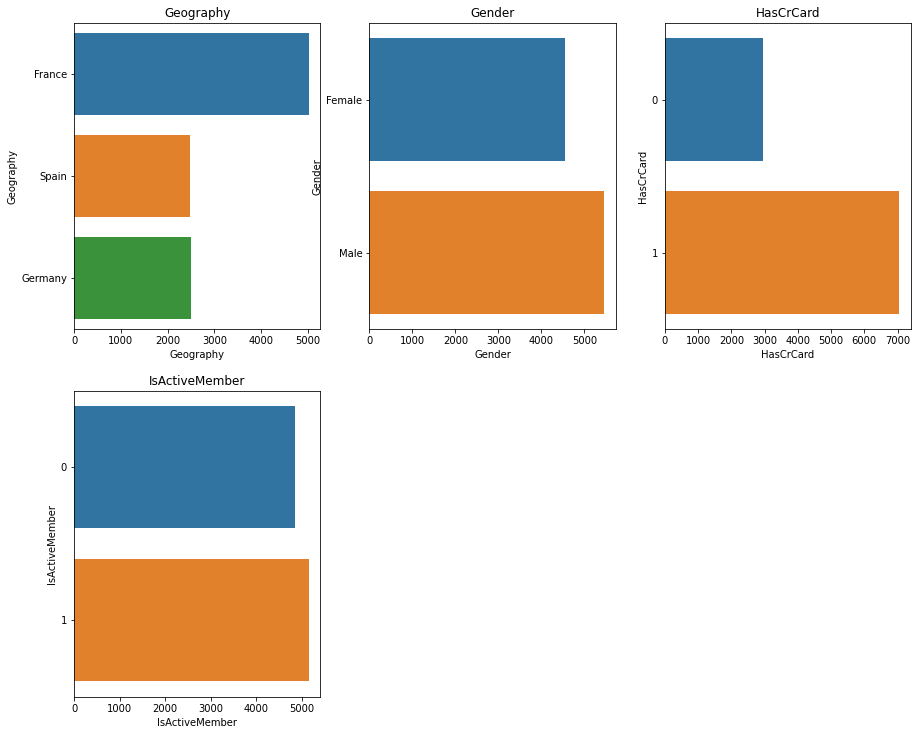

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for c in cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=c,data=df)
    plt.xlabel(c)
    plt.title(c)
    plotnumber+=1
plt.show()

**Takeaways:**
* **Geography** : There are more number of customers from France than other countries.
* **Gender :** Alsmost similar stats.
* **HasCrCard :** The number of customers with Credit card is more than those without.
* **IsActiveMember :** Almost similar counts.




---


**Next, lets find the relation between the catgorical variables and the label.**

<Figure size 360x720 with 0 Axes>

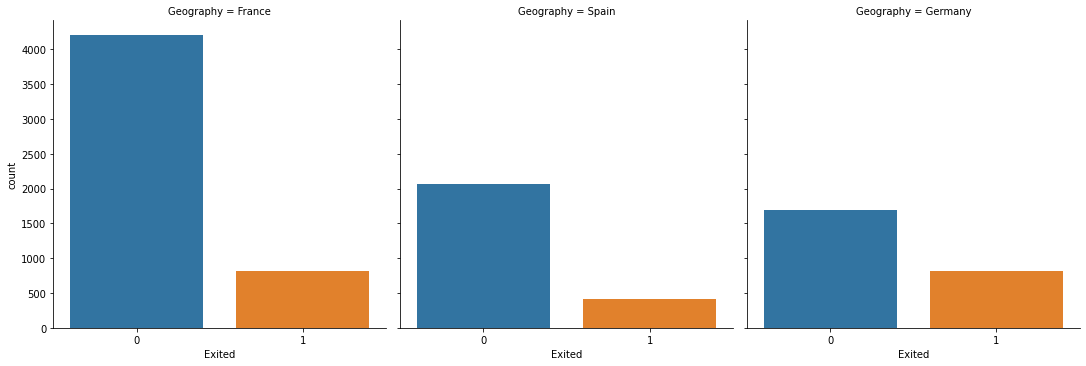

In [ ]:
plt.figure(figsize=(5, 10), facecolor='white')
sns.catplot(x='Exited', col='Geography', kind='count', data= df)
plt.show()

**Takeaway :** Spain has the least number of exited customers.


---



<Figure size 360x720 with 0 Axes>

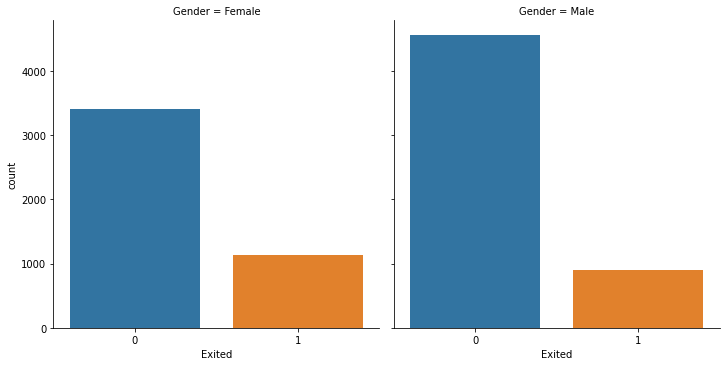

In [ ]:
plt.figure(figsize=(5, 10), facecolor='white')
sns.catplot(x='Exited', col='Gender', kind='count', data= df)
plt.show()

<Figure size 360x720 with 0 Axes>

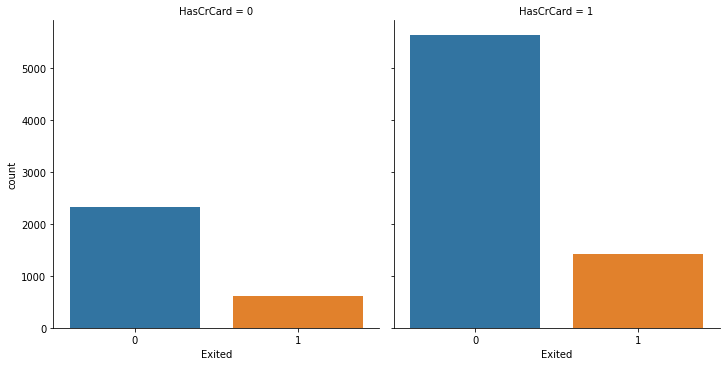

In [ ]:
plt.figure(figsize=(5, 10), facecolor='white')
sns.catplot(x='Exited', col='HasCrCard', kind='count', data= df)
plt.show()

**Takeaway:** It is interesting to note that customers with a credit card with the bank are the ones with more chances of being churned out, compared to the customers without credit cards.

<Figure size 360x720 with 0 Axes>

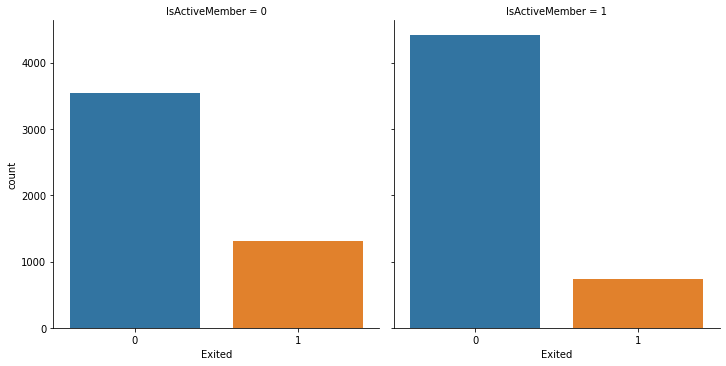

In [ ]:
plt.figure(figsize=(5, 10), facecolor='white')
sns.catplot(x='Exited', col='IsActiveMember', kind='count', data= df)
plt.show()

**Takeaway:** Customers who have not been active lately churn out.

## 3.2 Numerical Variables

In [ ]:
num = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
df[num].nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
EstimatedSalary     9999
dtype: int64

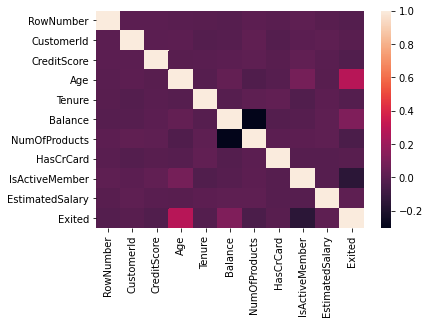

In [ ]:
sns.heatmap(df.corr())

**Takeaway:** From the above heatmap, we can see that the variables Age, Balance, HasCrCard, EstimatedSalary are correlated with the output variable.

# 4.Feature Engineering

## 4.1 Drop unwanted columns

By just observing the dataset, we can see that the first 3 columns are not of much use for our model as they are just random values. So we shall drop them.

In [ ]:
df.drop(['RowNumber',	'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 4.2 Encoding Categorical Features

Out of the categorical variables(object), we have Gender which is a kind of boolean values(yes/no). Geography has multiple categories/values. So, we shall use:

* replace Male/Female to 1/0 in Gender,
* get_dummies() on Geography.

In [ ]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
df = pd.concat([df,pd.get_dummies(df.Geography).iloc[:,1:]], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
df.drop(['Geography'], axis=1, inplace=True)

## 4.3 Scaling Numerical columns

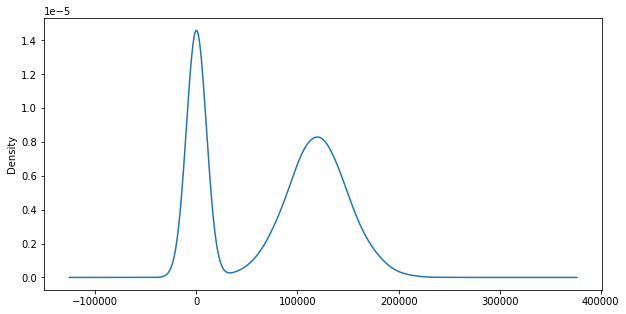

In [ ]:
fig = plt.figure(figsize = (10,5))
df['Balance'].plot(kind='density')
plt.show()

In [ ]:
import seaborn as sns
sns.distplot(df['Balance'])

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


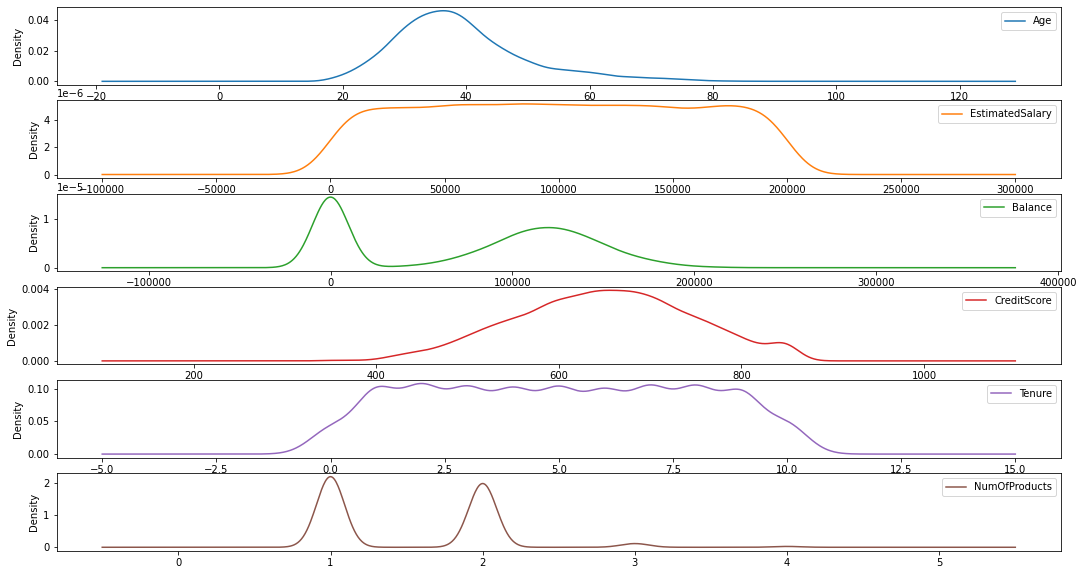

In [ ]:
fig = plt.figure(figsize = (18,10))
ax = fig.gca()
df[['Age','EstimatedSalary', 'Balance', 'CreditScore', 'Tenure', 'NumOfProducts']].plot(kind='density', subplots=True,  sharex=False, ax=ax)
plt.show()

# 5.Modeling

## 5.1 Data Splitting

In [ ]:
X =  df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 5.2 model and accuracy

* **Using RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
classifier1 = RandomForestClassifier(n_estimators=50, random_state=0)  
classifier1.fit(X_train, y_train)  
predictions = classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, plot_roc_curve, confusion_matrix
print(classification_report(y_test,predictions ))  
print(roc_auc_score(y_test, predictions ))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.75      0.53      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.7403924300476025
[[1523   72]
 [ 192  213]]


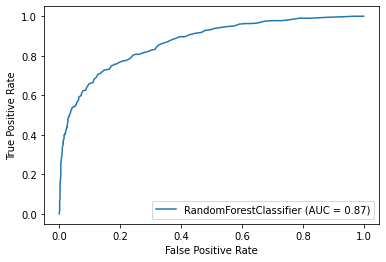

In [ ]:
plot_roc_curve(classifier1, X_test, y_test)  
plt.show()        

* **Using DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()  
classifier2.fit(X_train, y_train)  
predictions = classifier2.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions ))  
print(roc_auc_score(y_test, predictions ))
print(confusion_matrix(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1595
           1       0.51      0.56      0.54       405

    accuracy                           0.80      2000
   macro avg       0.70      0.71      0.71      2000
weighted avg       0.81      0.80      0.81      2000

0.7131429234877511
[[1377  218]
 [ 177  228]]


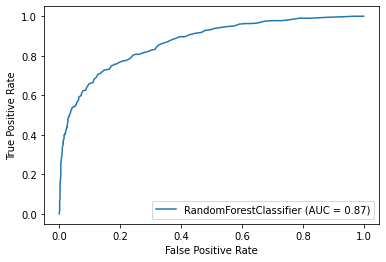

In [ ]:
plot_roc_curve(classifier1, X_test, y_test)  
plt.show()        

## 5.3 Feature Importance

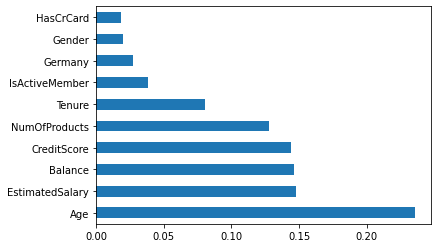

In [ ]:
feat_importances = pd.Series(classifier1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

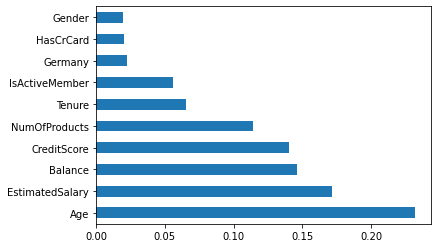

In [ ]:
feat_importances = pd.Series(classifier2.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Modified model

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.818


In [ ]:
# bootstrap class balanced random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.817


In [ ]:
# random forest with random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
# define model
model = BalancedRandomForestClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: nan


In [ ]:
# easy ensemble for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier
# define model
model = EasyEnsembleClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.849
